In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from scipy.stats import chi2_contingency

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

In [14]:
matrix = pd.read_csv("data.csv", index_col=0)  
matrix

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
Data,,,,,,,,,,,,,,,,,,,,
F1,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,6.0,NaN,NaN,7.0,NaN
F2,NaN,NaN,9.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
F3,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,6.0
F4,8.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,5.0,NaN,7.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
F5,NaN,NaN,NaN,7.0,NaN,5.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
F6,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,5.0,NaN
F7,NaN,NaN,NaN,8.0,NaN,NaN,6.0,NaN,NaN,7.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,5.0,NaN,6.0
F8,NaN,NaN,NaN,NaN,8.0,NaN,9.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F9,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,6.0,NaN


## Item-Item

In [15]:
def replace_nan(df):
    return df.fillna(0)

In [16]:
df_nan=replace_nan(matrix)
df_nan

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
Data,,,,,,,,,,,,,,,,,,,,
F1,7.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0
F2,0.0,0.0,9.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
F3,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0
F4,8.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
F5,0.0,0.0,0.0,7.0,0.0,5.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
F6,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0
F7,0.0,0.0,0.0,8.0,0.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,5.0,0.0,6.0
F8,0.0,0.0,0.0,0.0,8.0,0.0,9.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F9,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,6.0,0.0


In [21]:
def normalize_ratings(df):
    row_means = df.mean(axis=1)
    centered_ratings = df.sub(row_means, axis=0)  # Subtract row-wise mean
    return centered_ratings

In [22]:
df_norm=normalize_ratings(df_nan)
df_norm

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
Data,,,,,,,,,,,,,,,,,,,,
F1,5.10,-1.90,-1.90,-1.90,-1.90,6.10,-1.90,-1.90,-1.90,-1.90,-1.90,-1.90,8.10,-1.90,-1.90,4.10,-1.90,-1.90,5.10,-1.90
F2,-1.35,-1.35,7.65,-1.35,-1.35,-1.35,-1.35,3.65,-1.35,-1.35,-1.35,5.65,-1.35,-1.35,-1.35,-1.35,-1.35,4.65,-1.35,-1.35
F3,4.80,-1.20,-1.20,-1.20,-1.20,-1.20,-1.20,-1.20,-1.20,5.80,-1.20,-1.20,-1.20,3.80,-1.20,-1.20,-1.20,-1.20,-1.20,4.80
F4,6.35,-1.65,-1.65,-1.65,-1.65,-1.65,5.35,-1.65,-1.65,-1.65,3.35,-1.65,5.35,-1.65,4.35,-1.65,-1.65,-1.65,-1.65,-1.65
F5,-1.35,-1.35,-1.35,5.65,-1.35,3.65,-1.35,-1.35,6.65,-1.35,-1.35,-1.35,-1.35,-1.35,-1.35,-1.35,5.65,-1.35,-1.35,-1.35
F6,-1.05,7.95,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,-1.05,5.95,-1.05,-1.05,3.95,-1.05
F7,-2.05,-2.05,-2.05,5.95,-2.05,-2.05,3.95,-2.05,-2.05,4.95,-2.05,-2.05,-2.05,6.95,-2.05,-2.05,-2.05,2.95,-2.05,3.95
F8,-1.15,-1.15,-1.15,-1.15,6.85,-1.15,7.85,-1.15,-1.15,-1.15,-1.15,4.85,-1.15,-1.15,-1.15,-1.15,-1.15,-1.15,-1.15,-1.15
F9,-1.40,6.60,-1.40,-1.40,-1.40,-1.40,-1.40,-1.40,-1.40,-1.40,4.60,-1.40,-1.40,-1.40,-1.40,-1.40,6.60,-1.40,4.60,-1.40


In [33]:
def calculate_similarity(df):
    similarity_matrix = cosine_similarity(df)
    return similarity_matrix

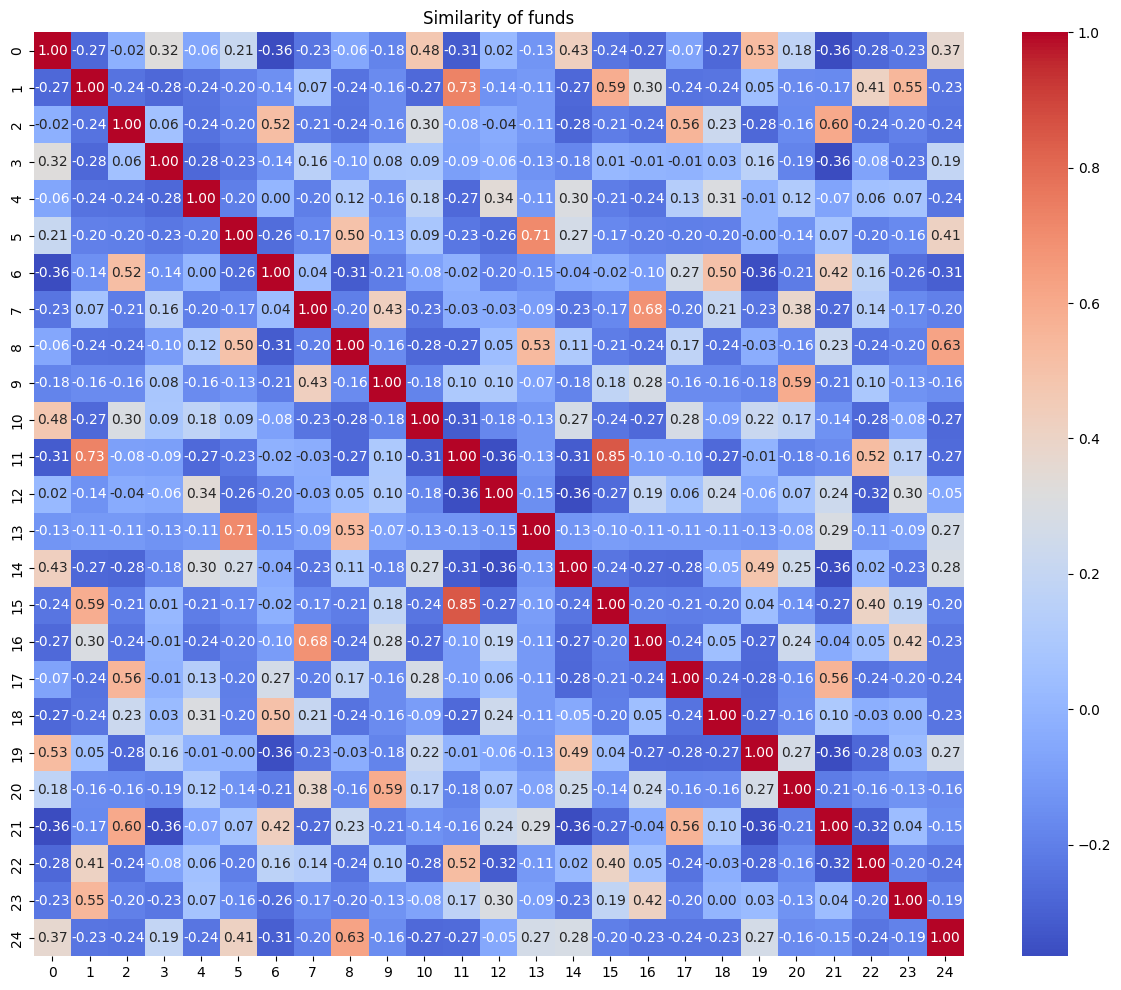

In [34]:
df_sim=calculate_similarity(df_norm)

plt.figure(figsize=(15, 12))
sns.heatmap(df_sim, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Similarity of funds')
plt.show()

In [40]:
def predict_ratings(df, sim_matrix, top_n=5):
    predicted_ratings = df.copy()
    for user in df.columns:
        for fund in df.index:
            if np.isnan(df.loc[fund, user]):  # If rating is missing
                fund_index = df.index.get_loc(fund)  # Get integer index of the fund
                similar_funds = sim_matrix[fund_index].argsort()[::-1][:top_n]  # Get top similar funds
                weighted_sum = 0
                weight_sum = 0
                for sim_fund_index in similar_funds:
                    if not np.isnan(df.iloc[sim_fund_index][user]):
                        similarity = sim_matrix[fund_index, sim_fund_index]
                        weighted_sum += similarity * df.iloc[sim_fund_index][user]
                        weight_sum += similarity
                if weight_sum != 0:
                    predicted_rating = weighted_sum / weight_sum
                else:
                    predicted_rating = 0
                predicted_ratings.loc[fund, user] = predicted_rating
    return predicted_ratings

In [41]:
ratings=predict_ratings(matrix, df_sim)
ratings

,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20
Data,,,,,,,,,,,,,,,,,,,,
F1,7.0,5.0,6.000000,9.000000,0.000000,8.000000,0.000000,0.000000,5.0,0.000000,6.957234,0.000000,10.000000,6.000000,0.000000,6.000000,0.000000,0.000000,7.000000,0.000000
F2,0.0,0.0,9.000000,6.000000,0.000000,0.000000,0.000000,5.000000,5.0,0.000000,0.000000,7.000000,0.000000,0.000000,6.523876,0.000000,0.000000,6.000000,0.000000,5.000000
F3,6.0,6.0,0.000000,8.000000,0.000000,7.000000,6.000000,5.000000,5.0,7.000000,0.000000,0.000000,0.000000,5.000000,0.000000,7.000000,7.439741,5.000000,0.000000,6.000000
F4,8.0,5.0,6.000000,0.000000,8.000000,8.329160,7.000000,0.000000,0.0,0.000000,5.000000,6.000000,7.000000,0.000000,6.000000,5.670840,0.000000,0.000000,8.124242,0.000000
F5,9.0,0.0,0.000000,7.000000,5.000000,5.000000,7.000000,6.000000,8.0,7.420391,6.000000,0.000000,8.000000,6.000000,0.000000,7.633816,7.000000,0.000000,7.000000,0.000000
F6,0.0,9.0,0.000000,9.000000,0.000000,10.000000,0.000000,0.000000,0.0,0.000000,6.701988,0.000000,6.000000,0.000000,0.000000,7.000000,8.000000,0.000000,5.000000,0.000000
F7,6.0,6.0,0.000000,8.000000,0.000000,0.000000,6.000000,5.000000,6.0,7.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,7.162319,5.000000,0.000000,6.000000
F8,0.0,0.0,0.000000,5.000000,8.000000,6.000000,9.000000,9.000000,6.0,9.000000,0.000000,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
F9,0.0,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,8.000000,6.000000,0.000000,6.000000,7.000000,0.000000,7.000000,8.000000,0.000000,6.000000,8.000000


In [42]:
def calculate_rmse(actual_ratings, predicted_ratings):
    # Flatten the actual and predicted ratings into 1D arrays
    actual = actual_ratings.values.flatten()
    predicted = predicted_ratings.values.flatten()
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse

In [46]:
rmse = calculate_rmse(df_nan, ratings)
print("RMSE:", rmse)

RMSE: 3.866908285771863


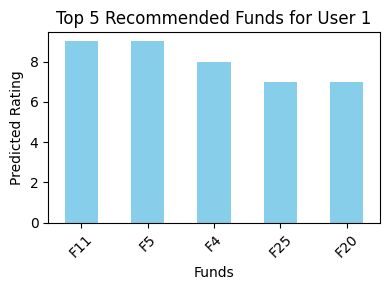

In [49]:
user1_recommendations = ratings.loc[:, 'U1'].sort_values(ascending=False)[:5]
plt.figure(figsize=(4, 3))
user1_recommendations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Recommended Funds for User 1')
plt.xlabel('Funds')
plt.ylabel('Predicted Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

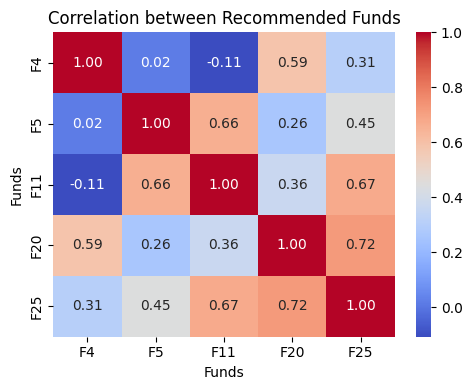

In [59]:
recommended_funds = ['F4', 'F5', 'F11', 'F20', 'F25']

# Extract the correlation matrix for the recommended funds
recommended_funds_corr = ratings.T[recommended_funds].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(recommended_funds_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Recommended Funds')
plt.xlabel('Funds')
plt.ylabel('Funds')
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer


def perform_svd(ratings_data, n_components=10):
    svd = TruncatedSVD(n_components=n_components)
    ratings_svd = svd.fit_transform(ratings_data)
    ratings_svd_normalized = Normalizer().fit_transform(ratings_svd)
    return ratings_svd_normalized, svd

def recommend_top_funds(ratings_svd_normalized, users, funds, top_n=5):
    recommendations = {}
    for user_idx, user_id in enumerate(users):
        user_ratings = ratings_svd_normalized[user_idx]
        ranked_funds_idx = np.argsort(user_ratings)[::-1][:top_n]  # Get indices of top N funds
        ranked_funds = [funds[idx] for idx in ranked_funds_idx]
        recommendations[user_id] = ranked_funds
    return recommendations


# Perform SVD with 10 latent factors
ratings_data = df_nan.to_numpy()
ratings_svd_normalized, svd = perform_svd(df_nan, n_components=10)

# Recommend top 5 funds for each user
recommendations = recommend_top_funds(ratings_svd_normalized, users, funds, top_n=5)

# Display recommendations
for user_id, recommended_funds in recommendations.items():
    print(f"Top 5 recommended funds for {user_id}: {recommended_funds}")

# Reconstruct the ratings matrix
reconstructed_ratings = np.dot(ratings_svd_normalized, svd.components_)

Top 5 recommended funds for U1: ['F1', 'F3', 'F7', 'F8', 'F4']
Top 5 recommended funds for U2: ['F3', 'F2', 'F1', 'F5', 'F4']
Top 5 recommended funds for U3: ['F1', 'F2', 'F7', 'F10', 'F8']
Top 5 recommended funds for U4: ['F7', 'F1', 'F8', 'F4', 'F3']
Top 5 recommended funds for U5: ['F1', 'F9', 'F6', 'F4', 'F8']
Top 5 recommended funds for U6: ['F5', 'F1', 'F6', 'F7', 'F3']
Top 5 recommended funds for U7: ['F1', 'F2', 'F6', 'F10', 'F7']
Top 5 recommended funds for U8: ['F4', 'F7', 'F2', 'F6', 'F1']
Top 5 recommended funds for U9: ['F5', 'F1', 'F9', 'F6', 'F7']
Top 5 recommended funds for U10: ['F9', 'F4', 'F7', 'F10', 'F2']
Top 5 recommended funds for U11: ['F1', 'F9', 'F7', 'F3', 'F4']
Top 5 recommended funds for U12: ['F2', 'F3', 'F1', 'F9', 'F5']
Top 5 recommended funds for U13: ['F1', 'F4', 'F8', 'F5', 'F2']
Top 5 recommended funds for U14: ['F5', 'F6', 'F1', 'F7', 'F9']
Top 5 recommended funds for U15: ['F1', 'F6', 'F3', 'F10', 'F9']
Top 5 recommended funds for U16: ['F3', 'F2',

In [21]:
def calculate_rmse(original_ratings, reconstructed_ratings):
    # Flatten both original and reconstructed ratings matrices
    original_ratings_flat = original_ratings.flatten()
    reconstructed_ratings_flat = reconstructed_ratings.flatten()
    
    # Calculate the squared error
    squared_error = np.square(original_ratings_flat - reconstructed_ratings_flat)
    
    # Calculate the mean squared error
    mean_squared_error = np.mean(squared_error)
    
    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error)
    
    return rmse


In [22]:
rmse = calculate_rmse(ratings_data, reconstructed_ratings)
print("RMSE:", rmse)

RMSE: 2.989567094253895
